In [ ]:
# We will use the MNIST Dataset 

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('03-logistic-regression')
jovian.set_colab_id('1JQ2pvnGRj163ARjxa178IrGfL9RW-s4L')

     |████████████████████████████████| 68 kB 4.8 MB/s 


In [3]:
jovian.commit

<function jovian.utils.commit.commit>

In [ ]:
# MNIST Handwritten Dataset

In [ ]:
# Using PyTorch - Logistical Model 


In [13]:
# Imports 
import torch 
import torchvision 
from torchvision.datasets import MNIST

In [14]:
# Download the Training Dataset 
dataset = MNIST(root='/data', download=True)

In [15]:
len(dataset)

60000

In [17]:
# Test Dataset 
test_dataset = MNIST(root='/data', train=False, download=True)
len(test_dataset)

10000

In [20]:
# Python Image Library - 
# Pillow in which an image is converted into  a object that can be used and intepretable in Python
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F954718DA90>, 5)

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
# %matplotlib inline is basically that we have to plot the Image within the Jupyter Library

Label: 5


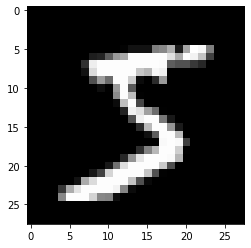

In [22]:
image , label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


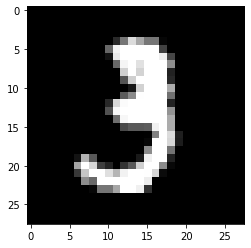

In [26]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [32]:
import torchvision.transforms as transforms

In [ ]:
'''

It is evident that images are relatively small in size and 
recognition of the digits can be sometimes be challenging even for the Human eye.
PyTorch does not know how to work with the images, we need to convert the images into Tensors,
by specifing a transform while creating our DataSet.

'''

In [30]:
import torchvision.transforms as transforms 

In [ ]:
# We will use ToTensor transform to convert images into PyTorch tensors.

In [34]:
# MNIST DATASET 
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [35]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
'''
The image is now converted to a 1*28*28  tensor, the first dimension color channel , second and thirs dimension represents pixel,
along the height and width of the image, respectively, since the image in the MNIST datasets are grayscales, ther's just one channel, 
Other Dataset have images with colors , in which case there are three channels: red, green and Blue (RGB)
'''

In [36]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# 0 white , 1 Black , all other Grey

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


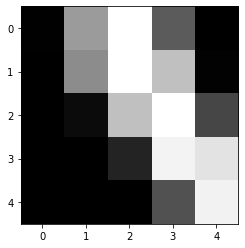

In [37]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [ ]:
# Training Set: used to train the model i.e compute the loss and adjust the model weight using gradient descent 
# Validation Set - used to evaluate the model during training, adjust the hyperparameters

In [ ]:
# Splitting the DataSet in Training and Validation Set
# We can use random_split method from PyTorch

In [39]:
# While u use the Validation during the Training , a separte set for Final Score - Testing Dataset
from torch.utils.data import random_split
# Manually splitting the images into 50,000 and 10,000 images 
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [40]:
from torch.utils.data import DataLoader 
batch_size = 128 
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size) # We don't Need A Randomize Here 

In [ ]:
# Shuffle - Randomize the Dataset and Speed up the Trainig Process 

In [41]:
import jovian
jovian.commit(project='03-logistic-regression-live')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression-live


'https://jovian.ai/blackholegalaxytechnologies/03-logistic-regression-live'

In [ ]:
### Working with Images and Logistic Regression 

In [ ]:
### Compare to the linear Regression we have the Whole Matrix as an Input 
### Now we have to label which class it belongs 0 - 9
### prediction = x @ w.t() + b

In [ ]:
### We are using nn.linear_model - image with 28 * 28 represents - 784 total inputs 

In [43]:
import torch.nn as nn 
input_size = 28*28
num_classes = 10
# Logistic Regression Model 
model = nn.Linear(input_size, num_classes)

# We will pick the Class with the Highest Probability As the Class Label

In [46]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0230,  0.0326, -0.0175,  ..., -0.0289,  0.0294, -0.0085],
        [-0.0009, -0.0109,  0.0111,  ..., -0.0110, -0.0279,  0.0183],
        [-0.0332, -0.0250, -0.0251,  ..., -0.0227,  0.0327,  0.0136],
        ...,
        [-0.0052, -0.0076, -0.0013,  ...,  0.0227,  0.0133, -0.0254],
        [ 0.0088, -0.0075, -0.0028,  ...,  0.0036, -0.0300,  0.0213],
        [-0.0255,  0.0313, -0.0040,  ...,  0.0306,  0.0321, -0.0268]],
       requires_grad=True)

In [48]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  print(outputs)
  break

In [ ]:
### The code above leads to an error 
### because our input data does not have the right shape 
### Our input are of Shape 1*28*28 but we need them to vectors of Size 784
### We need to flattern them, we will use the Reshape method of a tensor, which will allow us to efficiently 'view'
### each image as a flat vector without really creating a copy of the underlying data. 
### We need an extra model nn.Module 

In [52]:
images.shape

torch.Size([128, 1, 28, 28])

In [54]:
# Using Python Reshape Function Really Well
images.reshape(128, 784).shape

torch.Size([128, 784])

In [60]:
class MnistModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)


  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    # To make it more Generic 
    # 2 Dimensional , useful calculation where PyTorch Automaticallies Determines the first two 
    # Dimensions
    out = self.linear(xb)
    return out 

model = MnistModel()

In [61]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [62]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0118,  0.0263, -0.0272,  ..., -0.0098,  0.0286,  0.0090],
         [-0.0309,  0.0115,  0.0103,  ..., -0.0132,  0.0233,  0.0068],
         [ 0.0151,  0.0074,  0.0244,  ..., -0.0319,  0.0105, -0.0241],
         ...,
         [ 0.0165, -0.0278, -0.0332,  ...,  0.0023, -0.0278, -0.0250],
         [-0.0164,  0.0336, -0.0064,  ...,  0.0009,  0.0338, -0.0357],
         [ 0.0294,  0.0017, -0.0270,  ...,  0.0191,  0.0069, -0.0207]],
        requires_grad=True), Parameter containing:
 tensor([ 9.7249e-03, -2.4649e-02,  3.4034e-02,  1.6881e-02,  2.5640e-02,
         -4.0416e-05,  2.0157e-02,  2.3146e-02,  5.4213e-03,  2.1209e-03],
        requires_grad=True)]

In [63]:
for images, labels in train_loader:
  outputs = model(images)
  break


print('Output.shape :', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Output.shape : torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1092,  0.0355,  0.2463, -0.3227, -0.0007, -0.3431,  0.1448, -0.1616,
          0.0935, -0.0435],
        [ 0.2322,  0.1067,  0.2854, -0.0664,  0.1739, -0.1248,  0.2725, -0.0464,
          0.0699, -0.0134]])


In [ ]:
# To normaliza the Probability we have to Normalize the function 
# SoftMax Function to Level Things 

In [ ]:
'''p = 0.7 
p = 0.2 
p = 0.1 '''

In [ ]:
# The Softmax Function is included in the torch.nn.functional package 
# and requires along which the function should be applied

In [65]:
outputs[:2]

tensor([[ 0.1092,  0.0355,  0.2463, -0.3227, -0.0007, -0.3431,  0.1448, -0.1616,
          0.0935, -0.0435],
        [ 0.2322,  0.1067,  0.2854, -0.0664,  0.1739, -0.1248,  0.2725, -0.0464,
          0.0699, -0.0134]], grad_fn=<SliceBackward0>)

In [66]:
# Apply Softmax for each Output row 
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities 
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

NameError: ignored